In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc
from importlib import reload


Text(0, 0.5, '$N$')

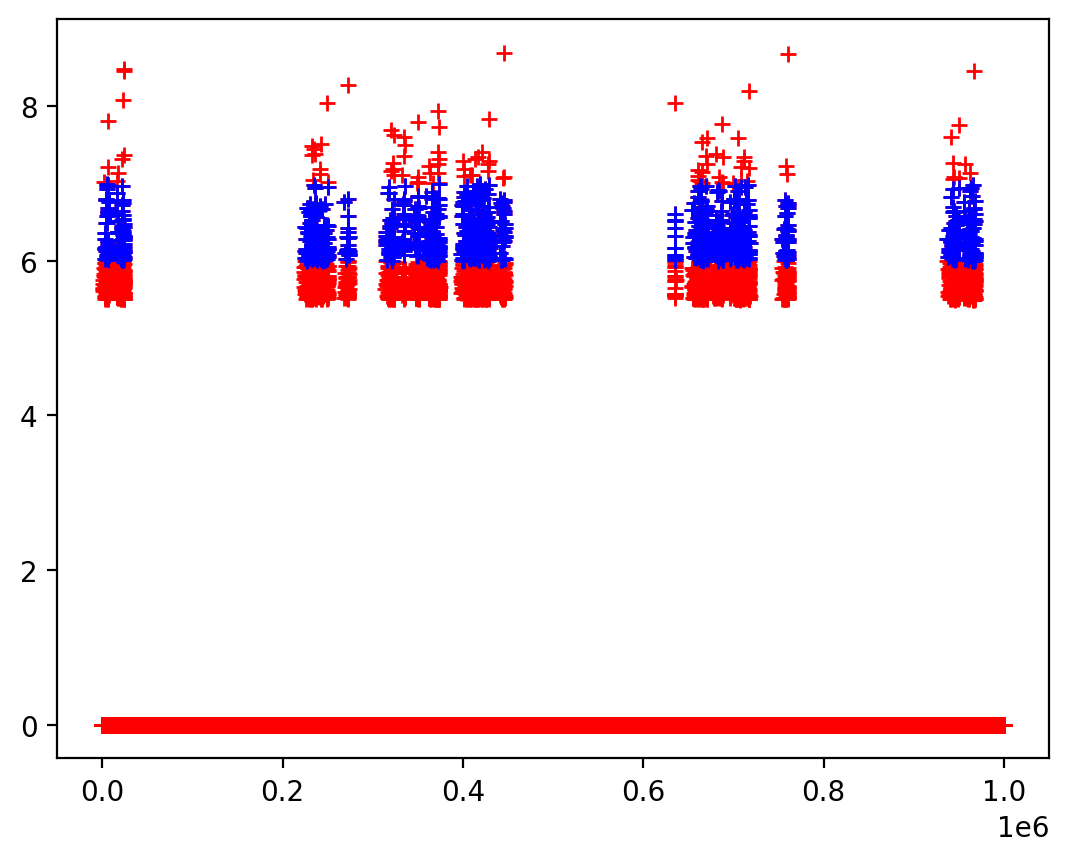

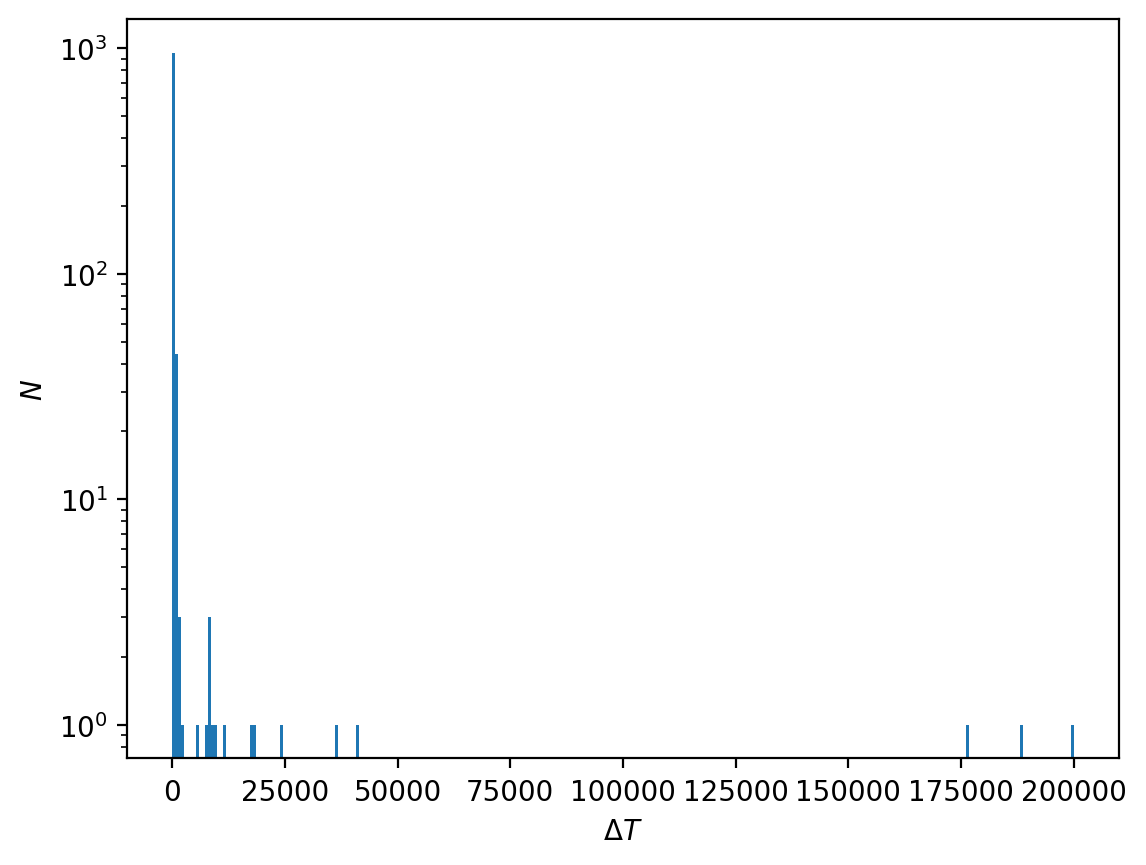

In [3]:
def get_most_recent_output_folder_name():
    most_recent_output_folder_name = sorted(glob.glob("./runs/*"))[-1]
    return most_recent_output_folder_name


most_recent_output_folder_name = get_most_recent_output_folder_name()
time_series = pickle.load(
    open(most_recent_output_folder_name + "/time_series.pickle", "rb")
)

plt.plot(time_series.time, time_series.event_magnitude, "r+")
lower_indices = np.where(time_series.event_magnitude >= 6.0)
upper_indices = np.where(time_series.event_magnitude < 7.0)
a = np.intersect1d(lower_indices, upper_indices)
plt.plot(time_series.time[a], time_series.event_magnitude[a], "b+")


# Calculate interevent times
plt.figure()
plt.hist(np.diff(time_series.time[a]), 300, log=True)
plt.xlabel("$\Delta T$")
plt.ylabel("$N$")




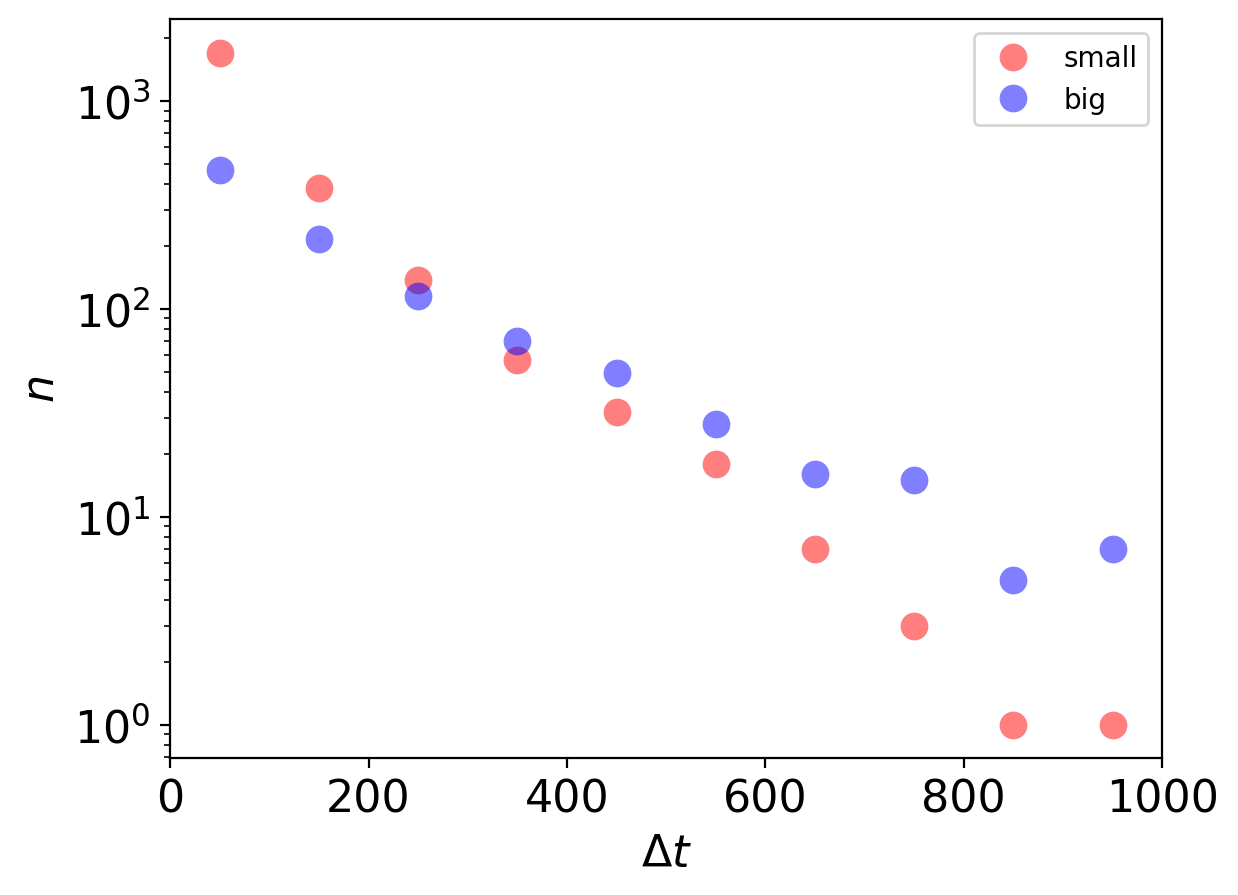

In [56]:
delta_t_bins = np.linspace(0, 1000, 11)
delta_t_bin_centers = (np.diff(delta_t_bins) + delta_t_bins[0:-1]) - 0.5 * (
    delta_t_bins[1] - delta_t_bins[0]
)

counts_all, _ = np.histogram(np.diff(time_series.time[np.where(time_series.event_magnitude > 0.0)[0]]), bins=delta_t_bins)

magnitude_bins = np.array([5.0, 6.0, 7.0, 8.0])

lower_indices = np.where(time_series.event_magnitude >= 5.5)
upper_indices = np.where(time_series.event_magnitude < 6.0)
a = np.intersect1d(lower_indices, upper_indices)
counts_a, _ = np.histogram(np.diff(time_series.time[a]), bins=delta_t_bins)

lower_indices = np.where(time_series.event_magnitude >= 6.0)
upper_indices = np.where(time_series.event_magnitude < 7.0)
b = np.intersect1d(lower_indices, upper_indices)
counts_b, _ = np.histogram(np.diff(time_series.time[b]), bins=delta_t_bins)


markersize = 10
alpha = 0.5
fontsize = 16

plt.figure()


# plt.semilogy(
#     delta_t_bin_centers,
#     counts_all,
#     "ks",
#     label="all",
#     markeredgecolor="k",
#     markeredgewidth=0.0,
#     markersize=markersize,
#     alpha=alpha,
# )
plt.semilogy(
    delta_t_bin_centers,
    counts_a,
    "ro",
    label="small",
    markeredgecolor="k",
    markeredgewidth=0.0,
    markersize=markersize,
    alpha=alpha,
)
plt.semilogy(
    delta_t_bin_centers,
    counts_b,
    "bo",
    label="big",
    markeredgecolor="k",
    markeredgewidth=0.0,
    markersize=markersize,
    alpha=alpha,
)
plt.legend()
plt.xlim([0, np.max(delta_t_bins)])
plt.xlabel("$\Delta t$", fontsize=fontsize)
plt.ylabel("$n$", fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.show()


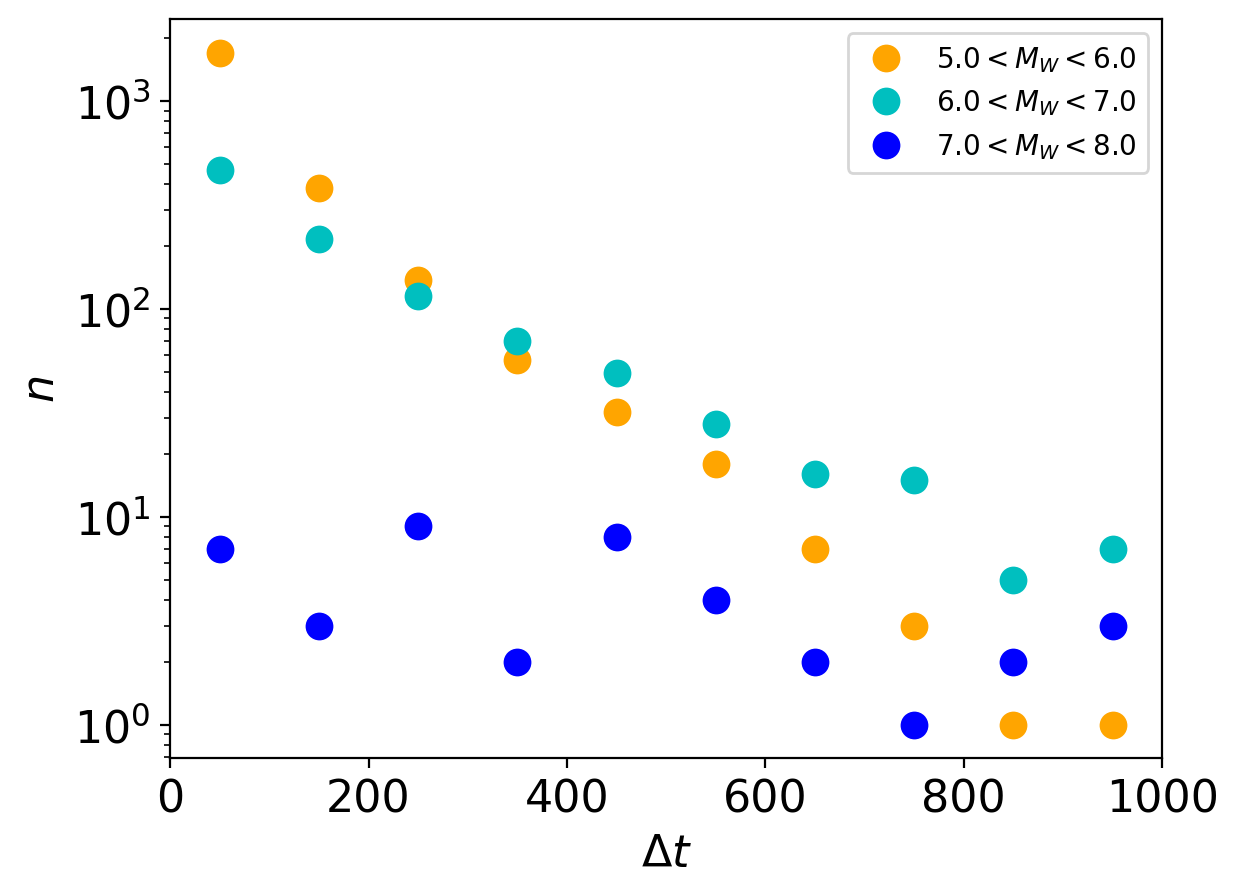

In [79]:
delta_t_bins = np.linspace(0, 1000, 11)
delta_t_bin_centers = (np.diff(delta_t_bins) + delta_t_bins[0:-1]) - 0.5 * (
    delta_t_bins[1] - delta_t_bins[0]
)

counts_all, _ = np.histogram(np.diff(time_series.time[np.where(time_series.event_magnitude > 0.0)[0]]), bins=delta_t_bins)

magnitude_bins = np.array([5.0, 6.0, 7.0, 8.0])
counts = list()

for i in range(len(magnitude_bins) - 1):
    lower_indices = np.where(time_series.event_magnitude >= magnitude_bins[i])
    upper_indices = np.where(time_series.event_magnitude < magnitude_bins[i + 1])
    a = np.intersect1d(lower_indices, upper_indices)
    counts_local, _ = np.histogram(np.diff(time_series.time[a]), bins=delta_t_bins)
    counts.append(counts_local)

# lower_indices = np.where(time_series.event_magnitude >= 6.0)
# upper_indices = np.where(time_series.event_magnitude < 7.0)
# b = np.intersect1d(lower_indices, upper_indices)
# counts_b, _ = np.histogram(np.diff(time_series.time[b]), bins=delta_t_bins)


markersize = 10
alpha = 1.0
fontsize = 16

plt.figure()

color_strings = ["orange", "c", "b"]
for i in range(len(magnitude_bins) - 1):
    label_string = f"{magnitude_bins[i]}" + "$ < M_W < $" + f"{magnitude_bins[i + 1]}"
    plt.semilogy(
        delta_t_bin_centers,
        counts[i],
        "o",
        label=label_string,
        markeredgecolor="k",
        markeredgewidth=0.0,
        markersize=markersize,
        color=color_strings[i],
        alpha=alpha,
    )
plt.legend()
plt.xlim([0, np.max(delta_t_bins)])
plt.xlabel("$\Delta t$", fontsize=fontsize)
plt.ylabel("$n$", fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.show()